Id: unique id for a news article
Title: the title of a news article
text: the text of the article; could be incomplete
Subject: News subject
Date: published date
class: a label that marks whether the news article is real or fake:
0: Fake
1: Real

Importing Required Libraries

In [5]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

Reading the Datasets

In [6]:
df_fake=pd.read_csv("Fake.csv")
df_real=pd.read_csv("True.csv")
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [7]:
df_real.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


Inserting 1 column class to dataframe to categorize real and fake news

In [8]:
df_fake["class"]= 0
df_real["class"]= 1

In [9]:
df_fake.shape,df_real.shape

((23481, 5), (21417, 5))

Droping last 10 rows and save it for manual testing

In [10]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
  df_fake.drop([i], axis=0, inplace=True)

df_real_manual_testing = df_real.tail(10)
for i in range(21416,21406,-1):
  df_real.drop([i],axis=0, inplace=True)

df_fake.shape,df_real.shape

((23471, 5), (21407, 5))

In [11]:
df_manual_testing=pd.concat([df_fake_manual_testing,df_real_manual_testing],axis=0)
df_manual_testing.to_csv("manual_testing.csv")

Merging the real and fake dataset

In [12]:
df_merge=pd.concat([df_fake,df_real],axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


Droping column date , subject and title which was not necessary .

In [13]:
df=df_merge.drop(["date","subject","title"],axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


Shuffling the data

In [14]:
df=df.sample(frac=1)
df.head(10)

,text,class
1646,If there s one person that Donald Trump can t ...,0
4028,It s clear that Donald Trump thinks his daught...,0
5117,"Dan Rather, an often unbiased and objective pr...",0
8311,MEXICO CITY (Reuters) - U.S. Republican presid...,1
13364,Hillary s pawn in the 2016 election is a contr...,0
13512,BUENOS AIRES (Reuters) - Argentina sentenced 2...,1
1898,Fox News is now probably regretting their deci...,0
11912,"EL ALTO, Bolivia (Reuters) - In El Alto, a for...",1
2614,WASHINGTON (Reuters) - If President Donald Tru...,1
2875,Many people have long suspected that Trump is ...,0


In [15]:
df.isnull().sum()

text     0
class    0
dtype: int64

Cleaning the data

In [16]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [17]:
df["text"] = df["text"].apply(wordopt)

In [18]:
df.head(10)

,text,class
1646,if there s one person that donald trump can t ...,0
4028,it s clear that donald trump thinks his daught...,0
5117,dan rather an often unbiased and objective pr...,0
8311,mexico city reuters u s republican presid...,1
13364,hillary s pawn in the election is a controver...,0
13512,buenos aires reuters argentina sentenced ...,1
1898,fox news is now probably regretting their deci...,0
11912,el alto bolivia reuters in el alto a for...,1
2614,washington reuters if president donald tru...,1
2875,many people have long suspected that trump is ...,0


Splitting data into training and test data

In [19]:
x = df["text"]
y = df["class"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

Convert text to vectors

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

1. logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [24]:
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9848484848484849

In [25]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8175
           1       0.98      0.98      0.98      7533

    accuracy                           0.98     15708
   macro avg       0.98      0.98      0.98     15708
weighted avg       0.98      0.98      0.98     15708



2.decision tree classification

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [27]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9953526865291571

In [28]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8175
           1       1.00      0.99      1.00      7533

    accuracy                           1.00     15708
   macro avg       1.00      1.00      1.00     15708
weighted avg       1.00      1.00      1.00     15708



3.random forest classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
pred_rfc = RFC.predict(xv_test)

In [32]:
RFC.score(xv_test, y_test)

0.9886681945505474

In [33]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8175
           1       0.99      0.99      0.99      7533

    accuracy                           0.99     15708
   macro avg       0.99      0.99      0.99     15708
weighted avg       0.99      0.99      0.99     15708



model testing

In [34]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction:  {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]),  
                                                                                                              output_lable(pred_RFC[0])))

In [40]:
news = str(input())
manual_testing(news)



LR Prediction: Real News 
DT Prediction:  Real News 
RFC Prediction: Real News


confusion matrix

In [45]:
# Function to plot the confusion matrix
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [46]:
x_train.head()

11502    an indian athlete who overcame a visa denial w...
12210                     https   www youtube com watch v 
21339    politically correct racism condoned by the lef...
17293    washington  reuters    the united states sough...
8261     vientiane  reuters    u s  president barack ob...
Name: text, dtype: object

In [47]:
y_train.head()

11502    0
12210    0
21339    0
17293    1
8261     1
Name: class, dtype: int64

accuracy score

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(x_train, y_train)

# Accuracy
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.52%


Confusion matrix, without normalization


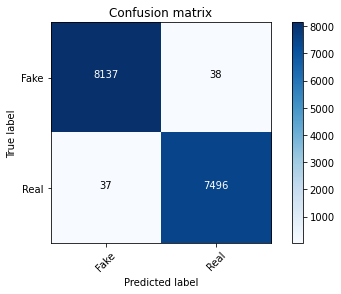

In [51]:
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])